In [2]:
############ nbtemplate parameterization ############
plot_id = 11875386
#####################################################

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pylab import arange
import matplotlib.cm as cm
import requests
import pandas as pd

data = requests.get("https://pulsars.nanograv.org/api/psrsearch/plots/%s/json" % plot_id).json()

## 2 Pulses of Best Profile

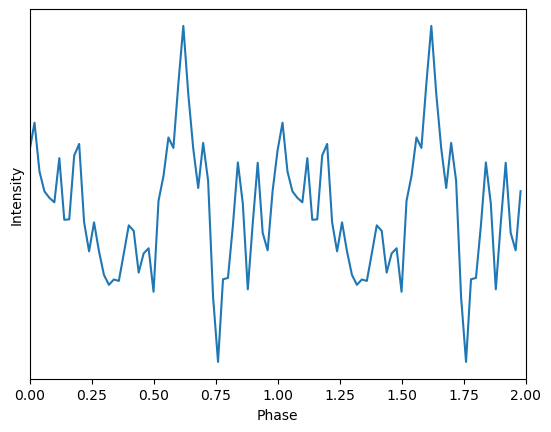

In [5]:
twopulses = data["profile"] + data["profile"] 

n = len(twopulses)

# scale the x coordinates to be 0 to 2
xpoints = 2 * arange(0,n) / n

plt.plot(xpoints, twopulses)

plt.xlabel("Phase")
plt.yticks([])
plt.ylabel("Intensity")
plt.xlim(0,2)

plt.show();
plt.close()

## Frequency vs Phase

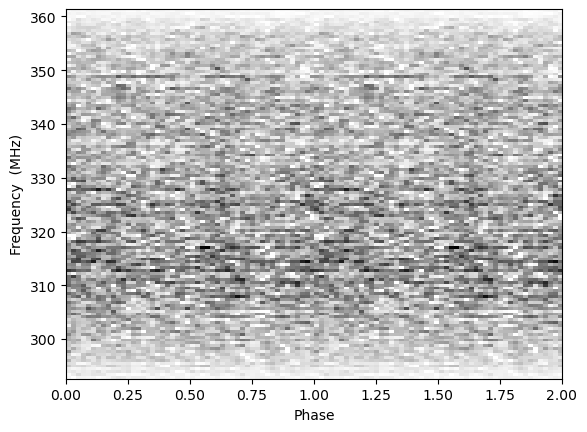

In [6]:
min_freq = data['meta']['lowfreq']
max_freq = data['meta']['highfreq']

FvP = np.concatenate((data['FvP'], data['FvP']), axis=1)

plt.imshow(FvP,
           origin='lower',
           aspect="auto",
           cmap=cm.gray_r, 
           interpolation = 'nearest',
           extent = [0,2,min_freq, max_freq] )

plt.xlabel("Phase");
plt.ylabel("Frequency  (MHz)")

plt.show()
plt.close()

## Time vs Phase Plot

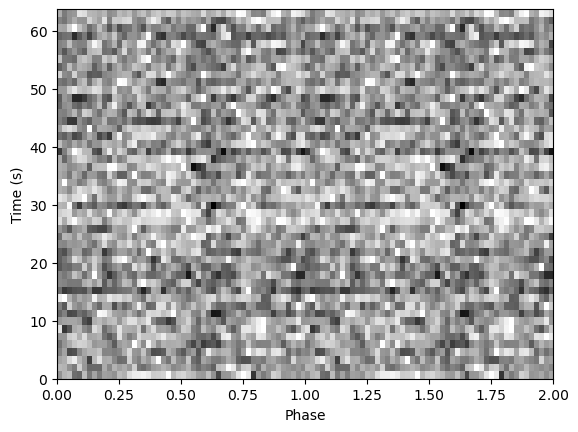

In [5]:
TvP = np.concatenate((data['TvP'], data['TvP']), axis=1)

observation_length = data['meta']['observation_length']

plt.imshow(TvP,  
           origin='lower',
           aspect='auto',
           cmap=cm.gray_r,
           interpolation = 'nearest',
           extent = [0 , 2, 0 , (observation_length)])

plt.xlabel("Phase")
plt.ylabel("Time (s)")

plt.show()
plt.close()

## Dispersion Measure Plot



Dispersion Measure peak at 41.320692974087216 pc/cm$^3$


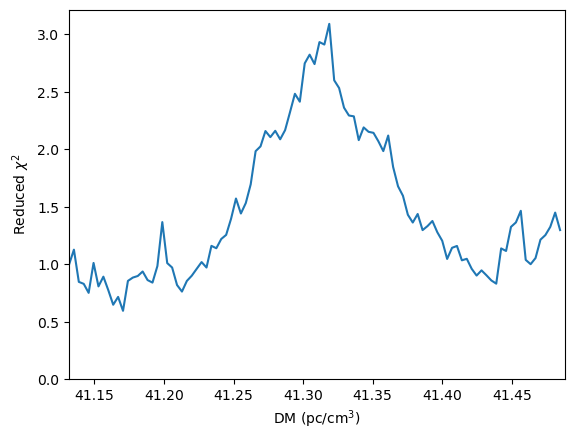

In [6]:
DM_axis_slope = (data['meta']["highdm"]-data['meta']["lowdm"])/data['meta']['ndms']
print("Dispersion Measure peak at "+str(data['meta']['bestdm'])+r" pc/cm$^3$")

xpoints = arange(0,data['meta']['ndms']) #List of xpoints from 0 to 201, it represents x of our line equation.

plt.plot(DM_axis_slope*xpoints+data['meta']["lowdm"],data['DMc'])

plt.ylabel(r"Reduced $\chi^2$")
plt.xlabel(r"DM (pc/cm$^3$)") #Latex commands chi symbol and subcript  
plt.ylim(0) #On the website they y axis starts at zero DM
plt.xlim(data['meta']["lowdm"],data['meta']["highdm"])

plt.show()
plt.close()